<a href="https://colab.research.google.com/github/Amulya-NRIdegree/Mini-project-/blob/main/House_Size_VS_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# step 1 = Generate a random Dataset
np.random.seed(42)# Used to set same sequence of value for the random package
numSamples = 100
#Create numSamples number of samples from (800,5000)
Size = np.random.randint(800,5000,numSamples)
bedrooms = np.random.randint(1,6, numSamples)
washroom = np.random.randint(1,8, numSamples)
localityScore = np.random.randint(1,10, numSamples)

# Generate House Price with randomness
HousePrice = (Size * 3000) + (bedrooms * 50000) + (washroom * 30000) + (localityScore * 70000) + np.random.randint(-50000,50000, numSamples)
#Create a dataframe
df = pd.DataFrame (
{
     'Size' : Size,
     'Bedrooms' : bedrooms,
     'Washrooms': washroom,
     'Locality score' : localityScore,
     'Price' : HousePrice,
}
)

In [ ]:
df

,Size,Bedrooms,Washrooms,Locality score,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [ ]:
# Step2 : Train a ML model - linear regression

# Package (installation) requirements
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['Size','Bedrooms','Washrooms','Locality score']]
Y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Step3 : Evaluate the model
# Package Requirements :
# sklearn.metric

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error : {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squared Error : 796791448.4323988
Root Mean Squared Error : 28227.494547557686


In [ ]:
#step 4: Make prediction
newhouse = np.array([[4000,4,6,10]])
predictionPrice = model.predict(newhouse)
predictionPrice[0]
print(f'The prediction prize of new house is {predictionPrice[0]}')

The prediction prize of new house is 13069094.887436867


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
Xsorted = np.sort(X, axis=0)
Ypred = model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-13-8e0ab12ad76b>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


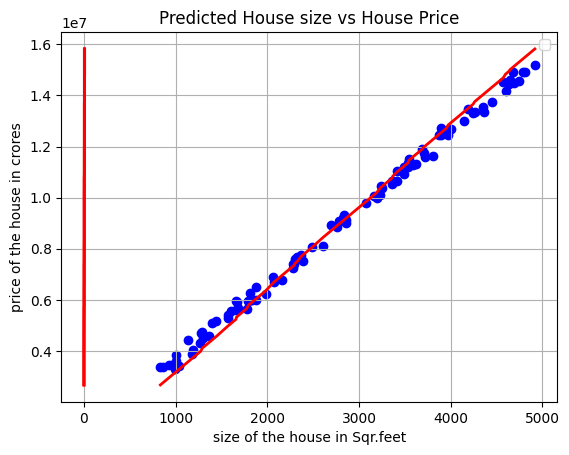

In [ ]:
plt.scatter(df['Size'],df['Price'], color = 'blue')
plt.plot(Xsorted,Ypred,color='red', linewidth=2) # Changed xSorted to Xsorted
plt.xlabel('size of the house in Sqr.feet')
plt.ylabel('price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('Predicted House size vs House Price')
plt.show()